In [43]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
data = pd.read_csv('car_data.csv',encoding='gbk')
train_x=data[["地区","人均GDP","城镇人口比重","交通工具消费价格指数","百户拥有汽车量"]]
train_x

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,北京,8.05,86.20,95.92,37.71
1,天津,8.34,80.50,103.57,20.62
2,河北,3.39,45.60,99.03,23.32
3,山西,3.13,49.68,98.96,18.60
4,内蒙古,5.79,56.62,99.11,19.62
5,辽宁,5.07,64.05,100.12,11.15
6,吉林,3.84,53.40,97.15,11.24
7,黑龙江,3.28,56.50,100.54,5.29
8,上海,8.18,89.30,101.58,18.15
9,江苏,6.22,61.90,98.95,23.92


In [44]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   地区          31 non-null     object 
 1   人均GDP       31 non-null     float64
 2   城镇人口比重      31 non-null     float64
 3   交通工具消费价格指数  31 non-null     float64
 4   百户拥有汽车量     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [45]:
'''
#将无法转化为float类型的数据“新疆”列删除;导致无法读取地区
#获取所有列名
col = list(train_x.columns)

#分别对每一列调用apply方法，出错的地方填入NaN
train_x[col] = train_x[col].apply(pd.to_numeric, errors='ignore')    #coerce表示将无效解析转化为空值

#删除含有NaN的行
train_x = train_x.dropna(axis=0,how='all')
train_x
'''

"\n#将无法转化为float类型的数据“新疆”列删除;导致无法读取地区\n#获取所有列名\ncol = list(train_x.columns)\n\n#分别对每一列调用apply方法，出错的地方填入NaN\ntrain_x[col] = train_x[col].apply(pd.to_numeric, errors='ignore')    #coerce表示将无效解析转化为空值\n\n#删除含有NaN的行\ntrain_x = train_x.dropna(axis=0,how='all')\ntrain_x\n"

In [46]:
#利用label encoder将编码还原
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_x['地区'] = le.fit_transform(train_x['地区'])
train_x

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,3,8.05,86.20,95.92,37.71
1,6,8.34,80.50,103.57,20.62
2,16,3.39,45.60,99.03,23.32
3,10,3.13,49.68,98.96,18.60
4,2,5.79,56.62,99.11,19.62
5,26,5.07,64.05,100.12,11.15
6,4,3.84,53.40,97.15,11.24
7,30,3.28,56.50,100.54,5.29
8,0,8.18,89.30,101.58,18.15
9,14,6.22,61.90,98.95,23.92


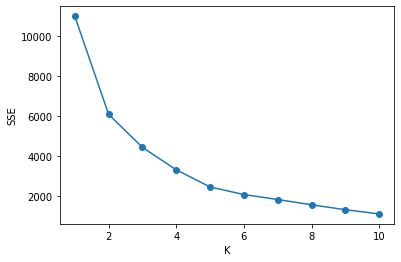

In [47]:
# K-Means 手肘法：统计不同K取值的误差平方和,选取合适的K值
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [51]:
#设置为4类
kmeans = KMeans(n_clusters=4)   
# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)    #没有此步骤，最后数据表的地区就无法识别为文本？？？
train_x

array([[0.1       , 0.95671642, 0.95344646, 0.        , 1.        ],
       [0.2       , 1.        , 0.86784803, 1.        , 0.47285626],
       [0.53333333, 0.26119403, 0.34374531, 0.40653595, 0.55613819],
       [0.33333333, 0.22238806, 0.40501577, 0.39738562, 0.41054904],
       [0.06666667, 0.61940299, 0.50923562, 0.41699346, 0.4420111 ],
       [0.86666667, 0.5119403 , 0.62081394, 0.54901961, 0.18075262],
       [0.13333333, 0.32835821, 0.46088001, 0.16078431, 0.18352869],
       [1.        , 0.24477612, 0.50743355, 0.60392157, 0.        ],
       [0.        , 0.9761194 , 1.        , 0.73986928, 0.39666872],
       [0.46666667, 0.68358209, 0.58852681, 0.39607843, 0.57464528],
       [0.6       , 0.63880597, 0.59453371, 0.10065359, 0.88093769],
       [0.26666667, 0.13731343, 0.33173149, 0.56601307, 0.12060457],
       [0.76666667, 0.45970149, 0.53146118, 0.63137255, 0.38679827],
       [0.5       , 0.14477612, 0.34524703, 0.65228758, 0.11073411],
       [0.3       , 0.45820896, 0.

In [52]:
# 使用kmeans进行聚类
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
predict_y

array([1, 3, 0, 0, 1, 2, 0, 2, 3, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0])

In [53]:
#将聚类结果添加至数据表
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
result

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
0,北京,8.05,86.20,95.92,37.71,1
1,天津,8.34,80.50,103.57,20.62,3
2,河北,3.39,45.60,99.03,23.32,0
3,山西,3.13,49.68,98.96,18.60,0
4,内蒙古,5.79,56.62,99.11,19.62,1
5,辽宁,5.07,64.05,100.12,11.15,2
6,吉林,3.84,53.40,97.15,11.24,0
7,黑龙江,3.28,56.50,100.54,5.29,2
8,上海,8.18,89.30,101.58,18.15,3
9,江苏,6.22,61.90,98.95,23.92,1


In [59]:
#将同一类评价结果地区放在一起
result.sort_values(by='聚类结果',ascending=False)

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
8,上海,8.18,89.30,101.58,18.15,3
1,天津,8.34,80.50,103.57,20.62,3
15,河南,2.87,40.57,100.59,14.06,2
16,湖北,3.41,51.83,101.15,9.69,2
28,青海,2.94,46.22,100.46,6.08,2
27,甘肃,1.96,37.15,100.54,7.33,2
26,陕西,3.34,47.30,101.59,12.22,2
5,辽宁,5.07,64.05,100.12,11.15,2
25,西藏,2.00,22.71,99.95,25.30,2
7,黑龙江,3.28,56.50,100.54,5.29,2


In [55]:
result1=result.groupby(result['聚类结果'])
result1.mean()

,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
聚类结果,,,,
0,2.886000,45.297000,99.655000,14.904000
1,5.960000,64.078333,97.786667,28.988333
2,3.116923,46.923846,100.600000,12.193077
3,8.260000,84.900000,102.575000,19.385000


[0 2 1 1 0 3 0 3 2 0 0 1 3 1 0 1 1 1 0 1 1 3 1 3 0 1 3 3 3 1 1]


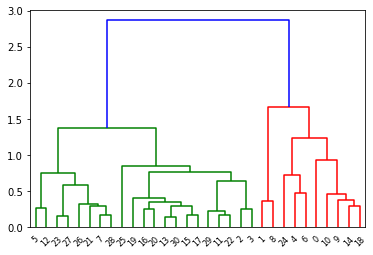

In [60]:
### 使用层次聚类
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
y = model.fit_predict(train_x)
print(y)

linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()
